In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import json
import numpy as np
import pandas as pd
import random

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    plot_confusion_matrix,
)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from weight_lifting import WeightLifting
from sfs_features import (
    get_lr_features,
    get_svm_features,
    get_mpl_features,
    get_dtc_features
)

from sklearn.ensemble import IsolationForest

In [4]:
np.random.seed(42)
random.seed(42)

### BASE PADRAO

In [5]:
engine = WeightLifting()
df = engine.load_df()
df = engine.transform(df)
X_train, X_test, y_train, y_test = engine.create_train_test(df)
base_padrao_predict = engine.fit_and_predict(X_train, X_test, y_train, y_test, state="INICIAL")

Model: LR
            Valor
Accuracy   0.9871
F1         0.9767
Precision  0.9676
Recall     0.9877

[[324   1   0   0   0]
 [  6 211   1   0   0]
 [  0   0  26   0   0]
 [  0   0   0  64   1]
 [  1   0   3   0 368]]

              precision    recall  f1-score      support
A              0.978852  0.996923  0.987805   325.000000
B              0.995283  0.967890  0.981395   218.000000
C              0.866667  1.000000  0.928571    26.000000
D              1.000000  0.984615  0.992248    65.000000
E              0.997290  0.989247  0.993252   372.000000
accuracy       0.987078  0.987078  0.987078     0.987078
macro avg      0.967618  0.987735  0.976654  1006.000000
weighted avg   0.987698  0.987078  0.987187  1006.000000



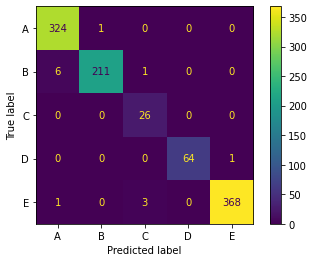

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9821
F1         0.9731
Precision  0.9899
Recall     0.9582

[[320   0   0   0   5]
 [  0 211   0   0   7]
 [  0   2  23   0   1]
 [  0   0   0  62   3]
 [  0   0   0   0 372]]

              precision    recall  f1-score      support
A              1.000000  0.984615  0.992248   325.000000
B              0.990610  0.967890  0.979118   218.000000
C              1.000000  0.884615  0.938776    26.000000
D              1.000000  0.953846  0.976378    65.000000
E              0.958763  1.000000  0.978947   372.000000
accuracy       0.982107  0.982107  0.982107     0.982107
macro avg      0.989875  0.958193  0.973093  1006.000000
weighted avg   0.982717  0.982107  0.982077  1006.000000



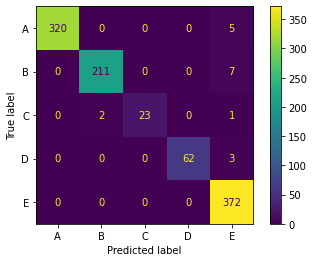

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3231
F1         0.0977
Precision  0.0646
Recall     0.2000

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score      support
A              0.323062  1.000000  0.488355   325.000000
B              0.000000  0.000000  0.000000   218.000000
C              0.000000  0.000000  0.000000    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              0.000000  0.000000  0.000000   372.000000
accuracy       0.323062  0.323062  0.323062     0.323062
macro avg      0.064612  0.200000  0.097671  1006.000000
weighted avg   0.104369  0.323062  0.157769  1006.000000



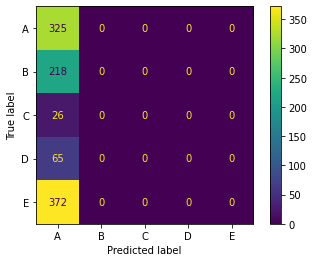

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.9841
F1         0.9665
Precision  0.9733
Recall     0.9600

[[320   5   0   0   0]
 [  3 213   2   0   0]
 [  0   3  23   0   0]
 [  0   0   0  62   3]
 [  0   0   0   0 372]]

              precision    recall  f1-score      support
A              0.990712  0.984615  0.987654   325.000000
B              0.963801  0.977064  0.970387   218.000000
C              0.920000  0.884615  0.901961    26.000000
D              1.000000  0.953846  0.976378    65.000000
E              0.992000  1.000000  0.995984   372.000000
accuracy       0.984095  0.984095  0.984095     0.984095
macro avg      0.973303  0.960028  0.966473  1006.000000
weighted avg   0.984129  0.984095  0.984049  1006.000000



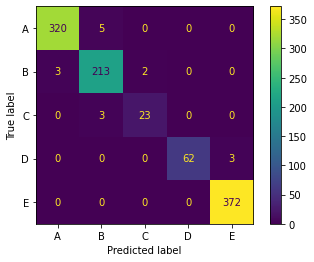

--------------------------------------------


In [6]:
engine.plot_results(base_padrao_predict, X_test, y_test)

## Remoção de Features Correlacionadas

In [7]:
df = engine.remove_correlated_features(df)
cor_X_train, cor_X_test, cor_y_train, cor_y_test = engine.create_train_test(df)
cor_predict = engine.fit_and_predict(cor_X_train, cor_X_test, cor_y_train, cor_y_test, state="COR")

Model: LR
            Valor
Accuracy   0.9553
F1         0.9072
Precision  0.9298
Recall     0.8897

[[315  10   0   0   0]
 [ 19 195   4   0   0]
 [  3   7  16   0   0]
 [  0   0   0  63   2]
 [  0   0   0   0 372]]

              precision    recall  f1-score      support
A              0.934718  0.969231  0.951662   325.000000
B              0.919811  0.894495  0.906977   218.000000
C              0.800000  0.615385  0.695652    26.000000
D              1.000000  0.969231  0.984375    65.000000
E              0.994652  1.000000  0.997319   372.000000
accuracy       0.955268  0.955268  0.955268     0.955268
macro avg      0.929836  0.889668  0.907197  1006.000000
weighted avg   0.954387  0.955268  0.954359  1006.000000



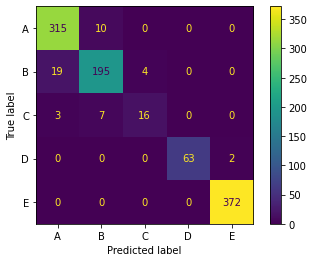

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9980
F1         0.9913
Precision  0.9986
Recall     0.9846

[[325   0   0   0   0]
 [  0 218   0   0   0]
 [  0   1  24   0   1]
 [  0   0   0  65   0]
 [  0   0   0   0 372]]

              precision    recall  f1-score      support
A              1.000000  1.000000  1.000000   325.000000
B              0.995434  1.000000  0.997712   218.000000
C              1.000000  0.923077  0.960000    26.000000
D              1.000000  1.000000  1.000000    65.000000
E              0.997319  1.000000  0.998658   372.000000
accuracy       0.998012  0.998012  0.998012     0.998012
macro avg      0.998551  0.984615  0.991274  1006.000000
weighted avg   0.998019  0.998012  0.997974  1006.000000



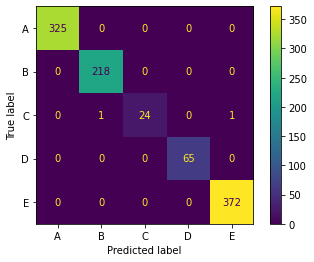

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3231
F1         0.0977
Precision  0.0646
Recall     0.2000

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score      support
A              0.323062  1.000000  0.488355   325.000000
B              0.000000  0.000000  0.000000   218.000000
C              0.000000  0.000000  0.000000    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              0.000000  0.000000  0.000000   372.000000
accuracy       0.323062  0.323062  0.323062     0.323062
macro avg      0.064612  0.200000  0.097671  1006.000000
weighted avg   0.104369  0.323062  0.157769  1006.000000



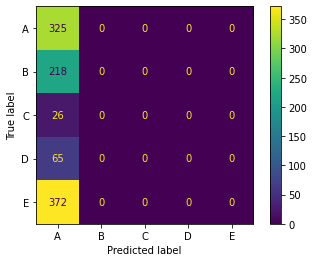

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.9732
F1         0.9451
Precision  0.9449
Recall     0.9452

[[317   6   2   0   0]
 [  7 209   2   0   0]
 [  0   4  22   0   0]
 [  0   0   0  62   3]
 [  0   0   0   3 369]]

              precision    recall  f1-score      support
A              0.978395  0.975385  0.976888   325.000000
B              0.954338  0.958716  0.956522   218.000000
C              0.846154  0.846154  0.846154    26.000000
D              0.953846  0.953846  0.953846    65.000000
E              0.991935  0.991935  0.991935   372.000000
accuracy       0.973161  0.973161  0.973161     0.973161
macro avg      0.944934  0.945207  0.945069  1006.000000
weighted avg   0.973185  0.973161  0.973171  1006.000000



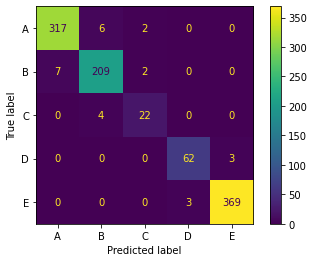

--------------------------------------------


In [8]:
engine.plot_results(cor_predict, cor_X_test, cor_y_test)

### ISOLATION FOREST

In [9]:
iso = IsolationForest(contamination=0.05)
predict = iso.fit_predict(df.iloc[:, 0:-1])

mask = predict != -1

iso_X_train, iso_X_test, iso_y_train, iso_y_test = engine.create_train_test(df.iloc[mask])

isolation_predict = engine.fit_and_predict(iso_X_train, iso_X_test, iso_y_train, iso_y_test, state="ISO")

Model: LR
            Valor
Accuracy   0.9603
F1         0.9198
Precision  0.9242
Recall     0.9156

[[334  13   0   0   0]
 [ 11 193   5   0   0]
 [  2   4  16   0   0]
 [  0   0   0  60   2]
 [  0   0   0   1 315]]

              precision    recall  f1-score     support
A              0.962536  0.962536  0.962536  347.000000
B              0.919048  0.923445  0.921241  209.000000
C              0.761905  0.727273  0.744186   22.000000
D              0.983607  0.967742  0.975610   62.000000
E              0.993691  0.996835  0.995261  316.000000
accuracy       0.960251  0.960251  0.960251    0.960251
macro avg      0.924157  0.915566  0.919767  956.000000
weighted avg   0.960076  0.960251  0.960148  956.000000



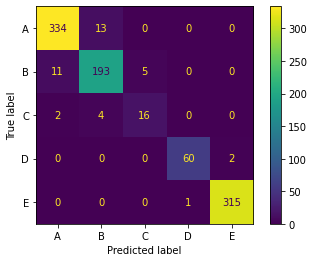

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9990
F1         0.9981
Precision  0.9968
Recall     0.9994

[[347   0   0   0   0]
 [  0 209   0   0   0]
 [  0   0  22   0   0]
 [  0   0   0  62   0]
 [  0   0   0   1 315]]

              precision    recall  f1-score     support
A              1.000000  1.000000  1.000000  347.000000
B              1.000000  1.000000  1.000000  209.000000
C              1.000000  1.000000  1.000000   22.000000
D              0.984127  1.000000  0.992000   62.000000
E              1.000000  0.996835  0.998415  316.000000
accuracy       0.998954  0.998954  0.998954    0.998954
macro avg      0.996825  0.999367  0.998083  956.000000
weighted avg   0.998971  0.998954  0.998957  956.000000



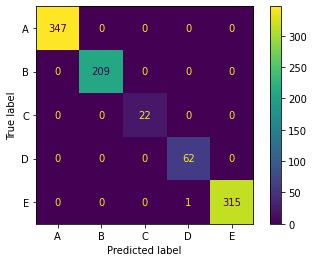

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3630
F1         0.1065
Precision  0.0726
Recall     0.2000

[[347   0   0   0   0]
 [209   0   0   0   0]
 [ 22   0   0   0   0]
 [ 62   0   0   0   0]
 [316   0   0   0   0]]

              precision    recall  f1-score     support
A              0.362971  1.000000  0.532617  347.000000
B              0.000000  0.000000  0.000000  209.000000
C              0.000000  0.000000  0.000000   22.000000
D              0.000000  0.000000  0.000000   62.000000
E              0.000000  0.000000  0.000000  316.000000
accuracy       0.362971  0.362971  0.362971    0.362971
macro avg      0.072594  0.200000  0.106523  956.000000
weighted avg   0.131748  0.362971  0.193324  956.000000



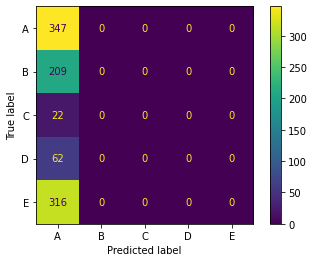

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.9854
F1         0.9729
Precision  0.9696
Recall     0.9763

[[345   2   0   0   0]
 [  3 205   1   0   0]
 [  0   1  21   0   0]
 [  0   0   0  60   2]
 [  0   0   0   5 311]]

              precision    recall  f1-score     support
A              0.991379  0.994236  0.992806  347.000000
B              0.985577  0.980861  0.983213  209.000000
C              0.954545  0.954545  0.954545   22.000000
D              0.923077  0.967742  0.944882   62.000000
E              0.993610  0.984177  0.988871  316.000000
accuracy       0.985356  0.985356  0.985356    0.985356
macro avg      0.969638  0.976312  0.972864  956.000000
weighted avg   0.985571  0.985356  0.985420  956.000000



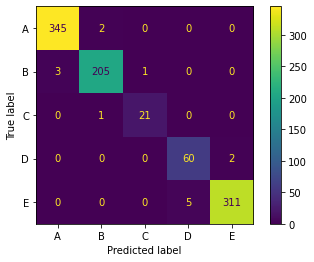

--------------------------------------------


In [10]:
engine.plot_results(isolation_predict, iso_X_test, iso_y_test)

### FEATURE SELECTION WITH SequentialFeatureSelector 

In [11]:
sfs_predict = []

# LOGISTIC REGRESSION
lr_X_train, lr_X_test, lr_y_train, lr_y_test = engine.create_train_test(df, features=get_lr_features())
lr_predict = engine.fit_and_predict(lr_X_train, lr_X_test, lr_y_train, lr_y_test, state="SFS")
lr_predict = lr_predict[0:1][0] # Somente o LR interessa
sfs_predict.append(lr_predict)

# SUPORT VECTOR MACHINES
svm_X_train, svm_X_test, svm_y_train, svm_y_test = engine.create_train_test(df, features=get_svm_features())
svm_predict = engine.fit_and_predict(svm_X_train, svm_X_test, svm_y_train, svm_y_test, state="SFS")
svm_predict = svm_predict[1:2][0] # Somente o SVM interessa
sfs_predict.append(svm_predict)

# MULTILAYER PERCEPTRON
mlp_X_train, mlp_X_test, mlp_y_train, mlp_y_test = engine.create_train_test(df, features=get_mpl_features())
mpl_predict = engine.fit_and_predict(mlp_X_train, mlp_X_test, mlp_y_train, mlp_y_test, state="SFS")
mpl_predict = mpl_predict[2:3][0] # Somente o mpl interessa
sfs_predict.append(mpl_predict)


# MULTILAYER PERCEPTRON
iso_dtc_X_train, iso_dtc_X_test, iso_dtc_y_train, iso_dtc_y_test = engine.create_train_test(df, features=get_dtc_features())
dtc_predict = engine.fit_and_predict(iso_dtc_X_train, iso_dtc_X_test, iso_dtc_y_train, iso_dtc_y_test, state="SFS")
dtc_predict = dtc_predict[3:4][0] # Somente o mpl interessa
sfs_predict.append(dtc_predict)

Model: LR
            Valor
Accuracy   0.9543
F1         0.8796
Precision  0.8947
Recall     0.8687

[[318   7   0   0   0]
 [ 14 197   7   0   0]
 [  6   7  13   0   0]
 [  0   0   0  63   2]
 [  0   0   0   3 369]]

              precision    recall  f1-score      support
A              0.940828  0.978462  0.959276   325.000000
B              0.933649  0.903670  0.918415   218.000000
C              0.650000  0.500000  0.565217    26.000000
D              0.954545  0.969231  0.961832    65.000000
E              0.994609  0.991935  0.993271   372.000000
accuracy       0.954274  0.954274  0.954274     0.954274
macro avg      0.894726  0.868660  0.879602  1006.000000
weighted avg   0.952530  0.954274  0.952973  1006.000000



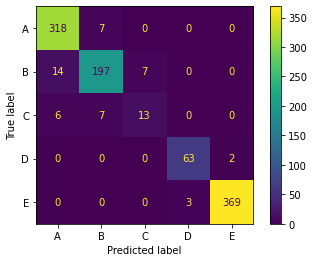

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9662
F1         0.8730
Precision  0.9419
Recall     0.8541

[[324   1   0   0   0]
 [  8 209   1   0   0]
 [  1  16   9   0   0]
 [  0   0   0  64   1]
 [  0   0   0   6 366]]

              precision    recall  f1-score      support
A              0.972973  0.996923  0.984802   325.000000
B              0.924779  0.958716  0.941441   218.000000
C              0.900000  0.346154  0.500000    26.000000
D              0.914286  0.984615  0.948148    65.000000
E              0.997275  0.983871  0.990528   372.000000
accuracy       0.966203  0.966203  0.966203     0.966203
macro avg      0.941863  0.854056  0.872984  1006.000000
weighted avg   0.965838  0.966203  0.962625  1006.000000



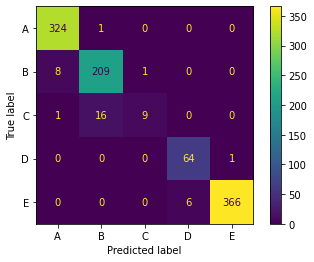

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3231
F1         0.0977
Precision  0.0646
Recall     0.2000

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score      support
A              0.323062  1.000000  0.488355   325.000000
B              0.000000  0.000000  0.000000   218.000000
C              0.000000  0.000000  0.000000    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              0.000000  0.000000  0.000000   372.000000
accuracy       0.323062  0.323062  0.323062     0.323062
macro avg      0.064612  0.200000  0.097671  1006.000000
weighted avg   0.104369  0.323062  0.157769  1006.000000



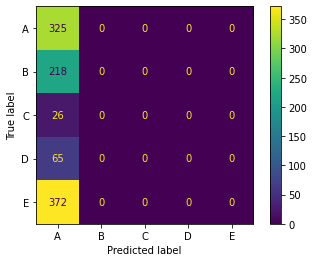

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.6272
F1         0.4494
Precision  0.4498
Recall     0.4509

[[250  45   6   2  22]
 [ 67  97  12   2  40]
 [  5  15   1   0   5]
 [  3   0   1  19  42]
 [ 28  31   2  47 264]]

              precision    recall  f1-score      support
A              0.708215  0.769231  0.737463   325.000000
B              0.515957  0.444954  0.477833   218.000000
C              0.045455  0.038462  0.041667    26.000000
D              0.271429  0.292308  0.281481    65.000000
E              0.707775  0.709677  0.708725   372.000000
accuracy       0.627237  0.627237  0.627237     0.627237
macro avg      0.449766  0.450926  0.449434  1006.000000
weighted avg   0.621039  0.627237  0.623129  1006.000000



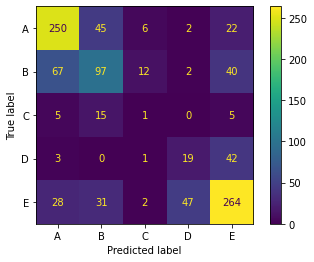

--------------------------------------------


In [12]:
engine.plot_results([sfs_predict[0]], lr_X_test, lr_y_test)
engine.plot_results([sfs_predict[1]], svm_X_test, svm_y_test)
engine.plot_results([sfs_predict[2]], mlp_X_test, mlp_y_test)
engine.plot_results([sfs_predict[3]], iso_dtc_X_test, iso_dtc_y_test)

### ISOLATION FOREST + SFS

In [13]:
iso_sfs_predict = []

# LOGISTIC REGRESSION
iso_lr_X_train, iso_lr_X_test, iso_lr_y_train, iso_lr_y_test = engine.create_train_test(df.iloc[mask], features=get_lr_features())
iso_lr_predict = engine.fit_and_predict(iso_lr_X_train, iso_lr_X_test, iso_lr_y_train, iso_lr_y_test, state="ISO_SFS")
iso_lr_predict = iso_lr_predict[0:1][0] # Somente o LR interessa
iso_sfs_predict.append(iso_lr_predict)

# SUPORT VECTOR MACHINES
iso_svm_X_train, iso_svm_X_test, iso_svm_y_train, iso_svm_y_test = engine.create_train_test(df.iloc[mask], features=get_svm_features())
iso_svm_predict = engine.fit_and_predict(iso_svm_X_train, iso_svm_X_test, iso_svm_y_train, iso_svm_y_test, state="ISO_SFS")
iso_svm_predict = iso_svm_predict[1:2][0] # Somente o SVM interessa
iso_sfs_predict.append(iso_svm_predict)

# MULTILAYER PERCEPTRON
iso_mlp_X_train, iso_mlp_X_test, iso_mlp_y_train, iso_mlp_y_test = engine.create_train_test(df.iloc[mask], features=get_mpl_features())
iso_mlp_predict = engine.fit_and_predict(iso_mlp_X_train, iso_mlp_X_test, iso_mlp_y_train, iso_mlp_y_test, state="ISO_SFS")
iso_mlp_predict = iso_mlp_predict[2:3][0] # Somente o mpl interessa
iso_sfs_predict.append(iso_mlp_predict)


# DECITION TREE CLASSFIED
iso_sfs_dtc_X_train, iso_sfs_dtc_X_test, iso_sfs_dtc_y_train, iso_sfs_dtc_y_test = engine.create_train_test(df.iloc[mask], features=get_dtc_features())
iso_dtc_predict = engine.fit_and_predict(
    iso_sfs_dtc_X_train, iso_sfs_dtc_X_test, iso_sfs_dtc_y_train, iso_sfs_dtc_y_test, state="ISO_SFS")
iso_dtc_predict = iso_dtc_predict[3:4][0] # Somente o mpl interessa
iso_sfs_predict.append(iso_dtc_predict)

Model: LR
            Valor
Accuracy   0.9561
F1         0.8952
Precision  0.9071
Recall     0.8847

[[335  11   1   0   0]
 [ 12 192   5   0   0]
 [  4   5  13   0   0]
 [  0   0   0  59   3]
 [  0   0   0   1 315]]

              precision    recall  f1-score     support
A              0.954416  0.965418  0.959885  347.000000
B              0.923077  0.918660  0.920863  209.000000
C              0.684211  0.590909  0.634146   22.000000
D              0.983333  0.951613  0.967213   62.000000
E              0.990566  0.996835  0.993691  316.000000
accuracy       0.956067  0.956067  0.956067    0.956067
macro avg      0.907121  0.884687  0.895160  956.000000
weighted avg   0.955171  0.956067  0.955508  956.000000



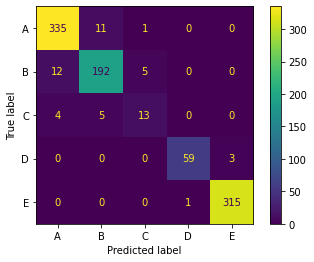

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9686
F1         0.9000
Precision  0.9284
Recall     0.8846

[[343   4   0   0   0]
 [  8 198   3   0   0]
 [  0  11  11   0   0]
 [  0   0   0  62   0]
 [  0   1   0   3 312]]

              precision    recall  f1-score     support
A              0.977208  0.988473  0.982808  347.000000
B              0.925234  0.947368  0.936170  209.000000
C              0.785714  0.500000  0.611111   22.000000
D              0.953846  1.000000  0.976378   62.000000
E              1.000000  0.987342  0.993631  316.000000
accuracy       0.968619  0.968619  0.968619    0.968619
macro avg      0.928400  0.884637  0.900020  956.000000
weighted avg   0.967457  0.968619  0.967219  956.000000



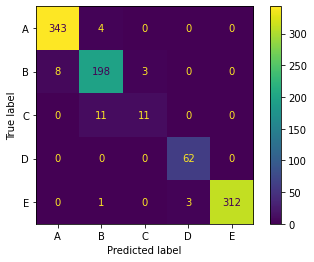

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.4665
F1         0.2218
Precision  0.1915
Recall     0.2693

[[229   0   0   0 118]
 [ 57   0   0   0 152]
 [  0   0   0   0  22]
 [ 23   0   0   0  39]
 [ 99   0   0   0 217]]

              precision    recall  f1-score     support
A              0.561275  0.659942  0.606623  347.000000
B              0.000000  0.000000  0.000000  209.000000
C              0.000000  0.000000  0.000000   22.000000
D              0.000000  0.000000  0.000000   62.000000
E              0.395985  0.686709  0.502315  316.000000
accuracy       0.466527  0.466527  0.466527    0.466527
macro avg      0.191452  0.269330  0.221787  956.000000
weighted avg   0.334617  0.466527  0.386223  956.000000



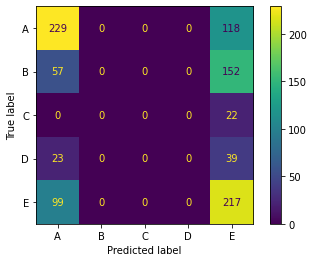

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.6182
F1         0.4756
Precision  0.4724
Recall     0.4798

[[247  64   7   4  25]
 [ 54 105  11   2  37]
 [  5  10   4   0   3]
 [  3   2   0  20  37]
 [ 26  29   5  41 215]]

              precision    recall  f1-score     support
A              0.737313  0.711816  0.724340  347.000000
B              0.500000  0.502392  0.501193  209.000000
C              0.148148  0.181818  0.163265   22.000000
D              0.298507  0.322581  0.310078   62.000000
E              0.678233  0.680380  0.679305  316.000000
accuracy       0.618201  0.618201  0.618201    0.618201
macro avg      0.472440  0.479797  0.475636  956.000000
weighted avg   0.623887  0.618201  0.620892  956.000000



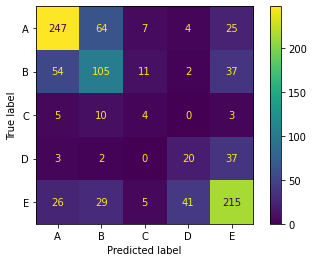

--------------------------------------------


In [14]:
engine.plot_results([iso_sfs_predict[0]], iso_lr_X_test, iso_lr_y_test)
engine.plot_results([iso_sfs_predict[1]], iso_svm_X_test, iso_svm_y_test)
engine.plot_results([iso_sfs_predict[2]], iso_mlp_X_test, iso_mlp_y_test)
engine.plot_results([iso_sfs_predict[3]], iso_sfs_dtc_X_test, iso_sfs_dtc_y_test)

### COMPARACAO DE RESULTADOS

In [15]:
# Unificando os resultados em um unico DF
resultados_df = pd.concat([
    pd.DataFrame(base_padrao_predict),
    pd.DataFrame(sfs_predict),
    pd.DataFrame(isolation_predict),
    pd.DataFrame(iso_sfs_predict),
    pd.DataFrame(cor_predict)
])

                   classificador                              tecnica  \
0            Regressão Logística                              Inicial   
0            Regressão Logística               Floresta de Isolamento   
0            Regressão Logística          Sequential Feature Selector   
0            Regressão Logística         SFS + Floresta de Isolamento   
0            Regressão Logística  Remoção de Features Correlacionadas   
1  Máquina de Vetores de Suporte                              Inicial   
1  Máquina de Vetores de Suporte               Floresta de Isolamento   
1  Máquina de Vetores de Suporte          Sequential Feature Selector   
1  Máquina de Vetores de Suporte         SFS + Floresta de Isolamento   
1  Máquina de Vetores de Suporte  Remoção de Features Correlacionadas   
2        Perceptron Multicamadas                              Inicial   
2        Perceptron Multicamadas               Floresta de Isolamento   
2        Perceptron Multicamadas          Sequentia

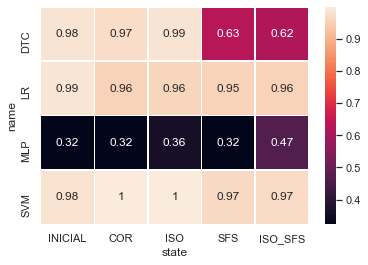

In [18]:
engine.plot_final_results(resultados_df)